In [3]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import functools
import math
%matplotlib inline

In [4]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

(a) Plot the graph with given code, the result should be same as this.
![](originalData.png)
`x_train` and `y_train` are the datas you need to create, `sample_size` is 10 and `std` is 0.25. 

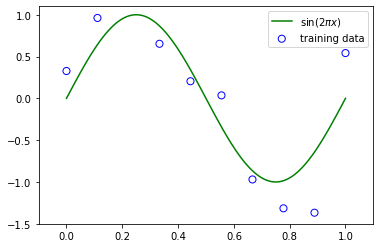

In [5]:
plt.xlim(xmax=1.1, xmin=-0.1)
plt.ylim(ymax=1.1, ymin=-1.5)
plt.scatter(x_train,y_train,facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test,y_test,c="g",label="$\sin(2\pi x)$")
plt.legend()
plt.show()


(b) On the basis of the results, you should try $0^{th}$ order polynomial, $1^{st}$ order polynomial, $3^{rd}$ order polynomial and some other order polynomial, show the results include fitting and over-fitting.
![](fitting.png)

In [6]:
class PolynomialFeature(object):
    """
    polynomial features

    transforms input array with polynomial features

    Example
    =======
    x =
    [[a, b],
    [c, d]]

    y = PolynomialFeatures(degree=2).transform(x)
    y =
    [[1, a, b, a^2, a * b, b^2],
    [1, c, d, c^2, c * d, d^2]]
    """

    def __init__(self, degree=2):
        """
        construct polynomial features

        Parameters
        ----------
        degree : int
            degree of polynomial
        """
        assert isinstance(degree, int)
        self.degree = degree

    def transform(self, x):
        """
        transforms input array with polynomial features

        Parameters
        ----------
        x : (sample_size, n) ndarray
            input array

        Returns
        -------
        output : (sample_size, 1 + nC1 + ... + nCd) ndarray
            polynomial features
        """
        if x.ndim == 1:
            x = x[:, None]
        x_t = x.transpose()
        features = [np.ones(len(x))]
        for degree in range(1, self.degree + 1):
            for items in itertools.combinations_with_replacement(x_t, degree):
                features.append(functools.reduce(lambda x, y: x * y, items))
        return np.asarray(features).transpose()
    
class Regression(object):
    """
    Base class for regressors
    """
    pass
    
class LinearRegression(Regression):
    """
    Linear regression model
    y = X @ w
    t ~ N(t|X @ w, var)
    """

    def fit(self, X:np.ndarray, t:np.ndarray):
        """
        perform least squares fitting

        Parameters
        ----------
        X : (N, D) np.ndarray
            training independent variable
        t : (N,) np.ndarray
            training dependent variable
        """
        self.w = np.linalg.pinv(X) @ t
        self.var = np.mean(np.square(X @ self.w - t))

    def predict(self, X:np.ndarray, return_std:bool=False):
        """
        make prediction given input

        Parameters
        ----------
        X : (N, D) np.ndarray
            samples to predict their output
        return_std : bool, optional
            returns standard deviation of each predition if True

        Returns
        -------
        y : (N,) np.ndarray
            prediction of each sample
        y_std : (N,) np.ndarray
            standard deviation of each predition
        """
        y = X @ self.w
        if return_std:
            y_std = np.sqrt(self.var) + np.zeros_like(y)
            return y, y_std
        return y

(10, 1) (10,)
(10, 2) (10,)
(10, 4) (10,)
(10, 10) (10,)


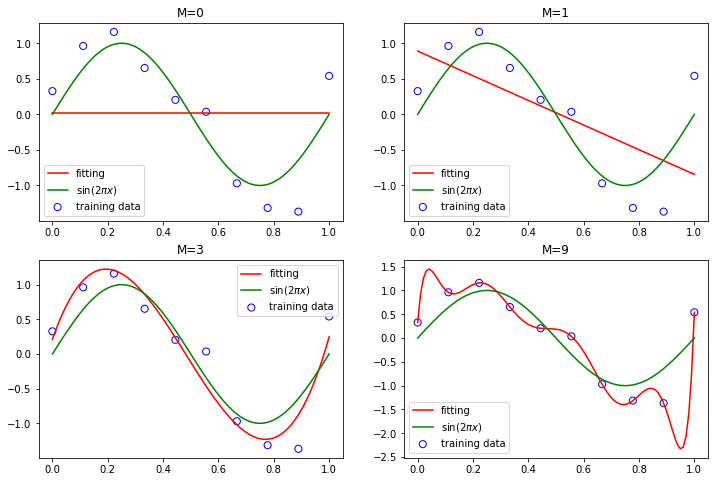

In [7]:
figure = plt.figure(figsize=(12,8))
for i,value in enumerate([0,1,3,9]):  
    # 产生value的阶的多项式
    pf = PolynomialFeature(value)
    x_train_ploy = pf.transform(x_train.reshape(-1,1))
    x_test_ploy = pf.transform(x_test.reshape(-1,1))
    print(x_train_ploy.shape,y_train.shape)
    # 运用多元线性回归代替多项式回归
    lr = LinearRegression()
    lr.fit(x_train_ploy,y_train)
    y_pred = lr.predict(x_test_ploy)
    
    #绘画子图并标注
    plt.subplot(2,2,i+1)
    plt.scatter(x_train,y_train,facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test,y_pred,c="r",label="fitting")
    plt.plot(x_test,y_test,c="g",label="$\sin(2\pi x)$")
    plt.title("M={}".format(value))
    plt.legend()
plt.show()


(c) Plot the graph of the root-mean-square error.
![](rmse.png)

In [8]:
def rmse(a, b):
    res = 0.0
    for i in range(len(a)):
        res += (a[i] - b[i]) ** 2
    return math.sqrt(res/len(a))

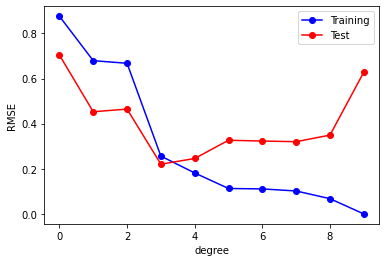

In [9]:
# Write your codes here.
training_errors = []
test_errors = []
for i in range(10):
    # 产生i的阶的多项式
    pf = PolynomialFeature(i)
    x_train_ploy = pf.transform(x_train.reshape(-1,1))
    x_test_ploy = pf.transform(x_test.reshape(-1,1))
    
    # 运用多元线性回归代替多项式回归
    lr = LinearRegression()
    lr.fit(x_train_ploy,y_train)
    y_train_pred = lr.predict(x_train_ploy)
    y_test_pred = lr.predict(x_test_ploy)
    # 计算rmse并添加
    training_errors.append(rmse(y_train, y_train_pred))
    test_errors.append(rmse(y_test, y_test_pred))

# 多项式回归的横坐标
x_pf = [x for x in range(10)]
plt.plot(x_pf,training_errors,marker='o',c="b",label="Training")
plt.plot(x_pf,test_errors,marker='o',c="r",label="Test")
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.legend()
plt.show()

(d) Plot the graph of the predictive distribution resulting from a Bayesian treatment of polynomial curve fitting using an M=9 polynomial, with the fixed parameters $\alpha=5\times 10^{-3}$ and $\beta=11.1$(corresponding to the known noise variance).
![](bayesianRegression.png)

In [10]:
class BayesianRegression(Regression):
    """
    Bayesian regression model

    w ~ N(w|0, alpha^(-1)I)
    y = X @ w
    t ~ N(t|X @ w, beta^(-1))
    """

    def __init__(self, alpha:float=1., beta:float=1.):
        self.alpha = alpha
        self.beta = beta
        self.w_mean = None
        self.w_precision = None

    def _is_prior_defined(self) -> bool:
        return self.w_mean is not None and self.w_precision is not None

    def _get_prior(self, ndim:int) -> tuple:
        if self._is_prior_defined():
            return self.w_mean, self.w_precision
        else:
            return np.zeros(ndim), self.alpha * np.eye(ndim)

    def fit(self, X:np.ndarray, t:np.ndarray):
        """
        bayesian update of parameters given training dataset

        Parameters
        ----------
        X : (N, n_features) np.ndarray
            training data independent variable
        t : (N,) np.ndarray
            training data dependent variable
        """

        mean_prev, precision_prev = self._get_prior(np.size(X, 1))

        w_precision = precision_prev + self.beta * X.T @ X
        w_mean = np.linalg.solve(
            w_precision,
            precision_prev @ mean_prev + self.beta * X.T @ t
        )
        self.w_mean = w_mean
        self.w_precision = w_precision
        self.w_cov = np.linalg.inv(self.w_precision)

    def predict(self, X:np.ndarray, return_std:bool=False, sample_size:int=None):
        """
        return mean (and standard deviation) of predictive distribution

        Parameters
        ----------
        X : (N, n_features) np.ndarray
            independent variable
        return_std : bool, optional
            flag to return standard deviation (the default is False)
        sample_size : int, optional
            number of samples to draw from the predictive distribution
            (the default is None, no sampling from the distribution)

        Returns
        -------
        y : (N,) np.ndarray
            mean of the predictive distribution
        y_std : (N,) np.ndarray
            standard deviation of the predictive distribution
        y_sample : (N, sample_size) np.ndarray
            samples from the predictive distribution
        """

        if sample_size is not None:
            w_sample = np.random.multivariate_normal(
                self.w_mean, self.w_cov, size=sample_size
            )
            y_sample = X @ w_sample.T
            return y_sample
        y = X @ self.w_mean
        if return_std:
            y_var = 1 / self.beta + np.sum(X @ self.w_cov * X, axis=1)
            y_std = np.sqrt(y_var)
            return y, y_std
        return y

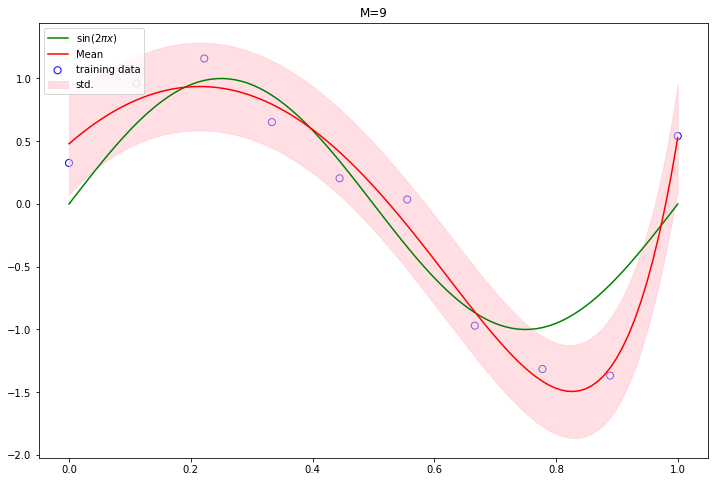

In [11]:
# 产生9阶项train and test 在给定alpha，beta进行贝叶斯概率预测
pf = PolynomialFeature(9)
x_train_ploy = pf.transform(x_train.reshape(-1,1))
x_test_ploy = pf.transform(x_test.reshape(-1,1))
model = BayesianRegression(alpha=5e-3, beta=11)
model.fit(x_train_ploy, y_train)
y, y_std = model.predict(x_test_ploy, return_std=True, sample_size=None)

fig = plt.figure(figsize=(12,8))
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="Mean")

# 画出标准差内的曲线分布
plt.fill_between(x_test, y - y_std, y + y_std, color="pink", label="std.", alpha=0.5)
plt.title("M=9")
plt.legend(loc=2)
plt.show()

(e) Change the $sample\_size$ to 2, 3 or 10 times than before, explain the change of $M$.

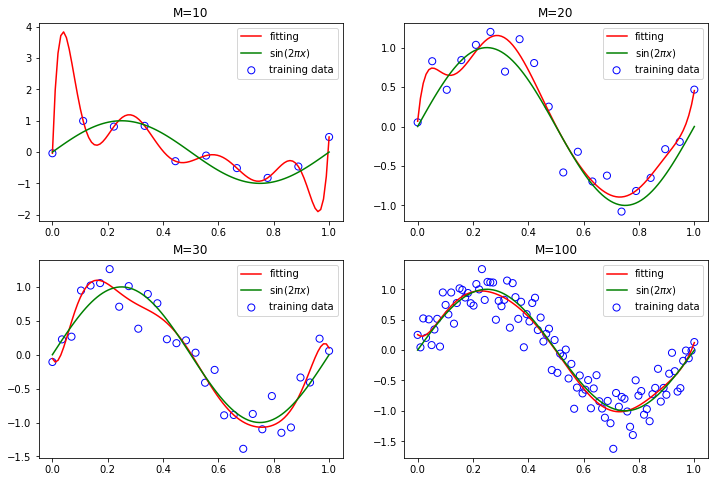

In [13]:
figure = plt.figure(figsize=(12,8))
# 采用10 20 30 100倍的训练数据和测试数据来进行9阶多项式回归
for i, num in enumerate([10, 20, 30, 100]):

    x_train, y_train = create_toy_data(func, num, 0.25)
    x_test = np.linspace(0, 1, 100)
    y_test = func(x_test)
    pf = PolynomialFeature(9)
    x_train_ploy = pf.transform(x_train.reshape(-1,1))
    x_test_ploy = pf.transform(x_test.reshape(-1,1))
    
    # 运用多元线性回归代替多项式回归
    lr = LinearRegression()
    lr.fit(x_train_ploy,y_train)
    y_pred = lr.predict(x_test_ploy)

    plt.subplot(2,2,i+1)
    plt.scatter(x_train,y_train,facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test,y_pred,c="r",label="fitting")
    plt.plot(x_test,y_test,c="g",label="$\sin(2\pi x)$")
    plt.title("M={}".format(num))
    plt.legend()
plt.show()

说明当数据量很大时，高阶多项式的拟合也会收敛的非常快

